# 最適化アルゴリズム

目的関数（コスト関数）を最小化するための種々のアルゴリズムについてのノート。

- $$X = \left( \boldsymbol{x}^{(1)}, \cdots. \boldsymbol{x}^{(N)} \right)$$: 全学習サンプルの集合
- $$\boldsymbol{w}$$: 更新すべき重み
- $$J(\boldsymbol{w}, X)$$: 重み $$\boldsymbol{w}$$、学習データ $$X$$ に対するコスト関数
- $$\eta$$: 学習率

# 勾配降下法

コスト関数の勾配を下る方向に重みを更新する。

## 最急降下法

毎回の重み更新ステップに全ての学習サンプルを使う。

$$
\boldsymbol{w} \longleftarrow \boldsymbol{w} - \eta \cfrac{\partial J}{\partial \boldsymbol{w}}\left(\boldsymbol{w}, X\right)
$$

## SGD

確率的勾配降下法。  
毎回の重み更新ステップにランダム抽出した1件 $$\boldsymbol{x}^{(i_r)}$$ だけを使う。

$$
\boldsymbol{w} \longleftarrow \boldsymbol{w} - \eta \cfrac{\partial J}{\partial \boldsymbol{w}}\left(\boldsymbol{w}, \boldsymbol{x}^{(i_r)}\right)
$$

## ミニバッチ SGD

毎回の重み更新ステップにランダム抽出した $$n\ (\lt N)$$ 件の集合 $$X_{batch}$$ を使う。

$$
\boldsymbol{w} \longleftarrow \boldsymbol{w} - \eta \cfrac{\partial J}{\partial \boldsymbol{w}}\left(\boldsymbol{w}, X_{batch}\right)
$$



# Momentum

お椀の中を転がって一番下を目指すイメージ。  
勾配に加えて「現在の速度」の概念を導入し、各ステップにおいて以下の操作を行う。

- 速度更新：勾配を下る方向へ加速
- 移動：現在の速度の方向へ


$$
\begin{eqnarray}
\boldsymbol{v} &\longleftarrow& \alpha \boldsymbol{v} - (1 - \alpha) \cfrac{\partial J}{\partial \boldsymbol{w}}\left(\boldsymbol{w}, X\right) \\
\boldsymbol{w} &\longleftarrow& \boldsymbol{w} + \boldsymbol{v}
\end{eqnarray}
$$


# AdaGrad

学習を進めるにつれて学習率を減衰させる手法。

$$
\begin{eqnarray}
\boldsymbol{h} &\longleftarrow& \boldsymbol{h} +
\left( \cfrac{\partial J}{\partial \boldsymbol{w}}\left(\boldsymbol{w}, X\right) \right)^2 \\
\boldsymbol{w} &\longleftarrow& \boldsymbol{w} -
\cfrac{\eta}{\sqrt{\boldsymbol{h}+\epsilon}}
\cfrac{\partial J}{\partial \boldsymbol{w}}\left(\boldsymbol{w}, X\right)
\end{eqnarray}
$$

$$\epsilon$$ はゼロ除算を避けるための非常に小さな正の定数。


# RMSProp

AdaGrad の改良。  
AdaGrad では $$\boldsymbol{h}$$ が大きくなり続けるので、繰り返し回数が大きくなると重みが更新されなくなる。

$$
\begin{eqnarray}
\boldsymbol{h} &\longleftarrow& \alpha \boldsymbol{h} + (1 - \alpha)
\left( \cfrac{\partial J}{\partial \boldsymbol{w}}\left(\boldsymbol{w}, X\right) \right)^2 \\
\boldsymbol{w} &\longleftarrow& \boldsymbol{w} -
\cfrac{\eta}{\sqrt{\boldsymbol{h}+\epsilon}}
\cfrac{\partial J}{\partial \boldsymbol{w}}\left(\boldsymbol{w}, X\right)
\end{eqnarray}
$$

# Adam

Momentum と RMSProp を合わせた手法。

$$
\begin{eqnarray}
\boldsymbol{v} &\longleftarrow& \alpha_v \boldsymbol{v} - (1 - \alpha_v) \cfrac{\partial J}{\partial \boldsymbol{w}}\left(\boldsymbol{w}, X\right) \\
\boldsymbol{h} &\longleftarrow& \alpha_h \boldsymbol{h} + (1 - \alpha_h)
\left( \cfrac{\partial J}{\partial \boldsymbol{w}}\left(\boldsymbol{w}, X\right) \right)^2 \\
\boldsymbol{w} &\longleftarrow& \boldsymbol{w} -
\cfrac{\eta}{\sqrt{\boldsymbol{h}+\epsilon}} v
\end{eqnarray}
$$

In [222]:
import numpy as np

class GradientDescent:
    def __init__(self, eta):
        self.eta = eta
    def update_params(self, w, grad):
        return w - self.eta * grad

class Momentum:
    def __init__(self, alpha):
        self.alpha = alpha
        self.v = np.zeros(2)
    def update_params(self, w, grad):
        self.v = self.alpha * self.v - (1-self.alpha) * grad
        return w + self.v

class AdaGrad:
    eps = 1e-12
    def __init__(self, eta):
        self.eta = eta
        self.h = np.zeros(2)
    def update_params(self, w, grad):
        self.h += grad * grad
        return w - self.eta * grad / np.sqrt(self.h + self.eps)

class RMSProp:
    eps = 1e-12
    def __init__(self, eta, alpha):
        self.eta = eta
        self.alpha = alpha
        self.h = np.zeros(2)
    def update_params(self, w, grad):
        self.h = self.h * self.alpha + (1-self.alpha) * grad * grad
        return w - self.eta * grad / np.sqrt(self.h + self.eps)

class Adam:
    eps = 1e-12
    def __init__(self, eta, alpha_v, alpha_h):
        self.eta = eta
        self.alpha_v = alpha_v
        self.alpha_h = alpha_h
        self.v = np.zeros(2)
        self.h = np.zeros(2)
    def update_params(self, w, grad):
        self.h = self.alpha_h * self.h + (1-self.alpha_h) * grad * grad
        self.v = self.alpha_v * self.v - (1-self.alpha_v) * grad
        return w + self.eta * self.v / np.sqrt(self.h + self.eps)

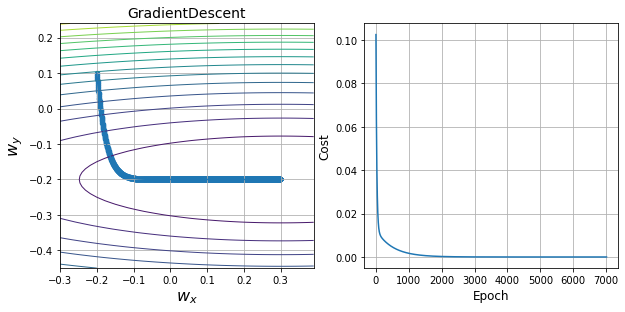

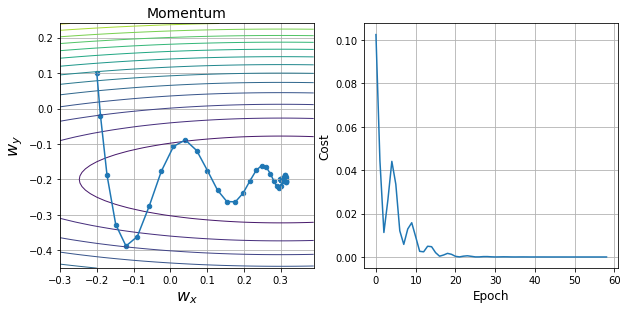

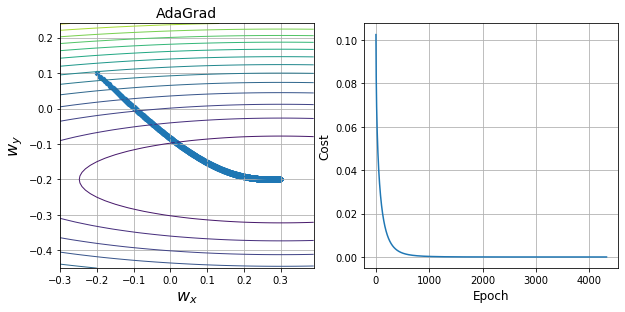

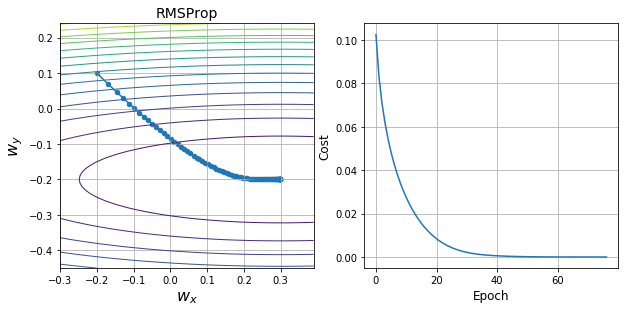

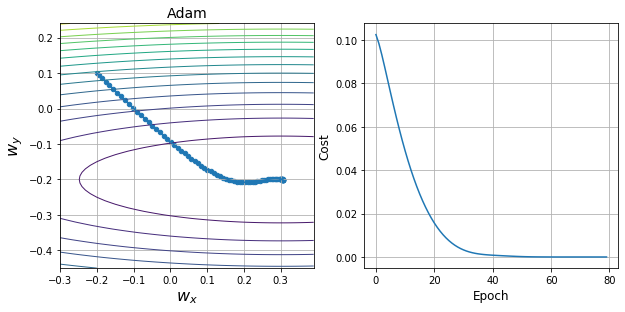

In [247]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np

def calc_cost(w1, w2):
    return (w1-0.3)**2 / 20.0 + (w2+0.2)**2
def calc_cost_grad(w1, w2):
    return np.array([(w1-0.3)/10.0, 2.0*(w2+0.2)])

EPOCH = 10000
optimizers = [
    GradientDescent(eta=0.01),
    Momentum(alpha=0.8),
    AdaGrad(eta=0.01),
    RMSProp(eta=0.01, alpha=0.9),
    Adam(eta=0.01, alpha_v=0.8, alpha_h=0.9)
]
for opt in optimizers:
    plt.figure(figsize=(10, 4.5))

    # コスト関数の等高線を描画
    plt.subplot(1, 2, 1)
    plt.xlabel('$w_x$', fontsize=16)
    plt.ylabel('$w_y$', fontsize=16)
    plt.title(opt.__class__.__name__, fontsize=14)
    x = np.arange(-0.3, 0.4, 0.01)
    y = np.arange(-0.45, 0.25, 0.01)
    w1, w2 = np.meshgrid(x, y)
    z = calc_cost(w1, w2)
    plt.contour(x, y, z, 20, linewidths=1.0)

    # 最適化の過程を描画
    w = np.array([-0.2, 0.10])
    w_list = [w]
    cost_list = [calc_cost(w[0], w[1])]
    for _ in range(EPOCH):
        grad = calc_cost_grad(w[0], w[1])
        w = opt.update_params(w, grad)
        w_list.append(w)
        cost = calc_cost(w[0], w[1])
        cost_list.append(cost)
        if cost < 1e-8:
            break
    w_list = np.array(w_list)
    plt.scatter(w_list[:, 0], w_list[:, 1], s=20)
    plt.plot(w_list[:, 0], w_list[:, 1])
    plt.grid()
    
    # コスト関数の値の変化を描画
    plt.subplot(1, 2, 2)
    plt.xlabel('Epoch', fontsize=12)
    plt.ylabel('Cost', fontsize=12)
    plt.plot(range(len(cost_list)), cost_list)
    plt.grid()

    plt.show()